In [1]:
from src.data_preprocessor import DataProcessor
from data_configs.configs import *
from models.decision_tree import DecisionTree, DecisionTreeNode
from models.null_model import NullModelClassification
from src.cross_validation import CrossValidation
from src.evaluation import Evaluation
import numpy as np

config = albalone_config
data_processor = DataProcessor(config=config)
cross_validator = CrossValidation(config=config)

In [2]:
raw_data = data_processor.load_data()
data_1 = data_processor.impute_missing_values(raw_data)
data_2 = data_processor.encode_nominal_features(data_1)
data_3 = data_processor.encode_ordinal_features(data_2)
data_4 = data_processor.standardize_data(data_3,data_3,features=['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'])

In [3]:
data_4.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

In [4]:
data_4 = data_4[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight','Sex_F', 'Sex_I', 'Sex_M','Rings']]

In [5]:
data_4

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M,Rings
0,-0.574489,-0.432097,-1.064297,-0.641821,-0.607613,-0.726125,-0.638140,0,0,1,15
1,-1.448812,-1.439757,-1.183837,-1.230130,-1.170770,-1.205077,-1.212842,0,0,1,7
2,0.050027,0.122116,-0.107978,-0.309432,-0.463444,-0.356647,-0.207114,1,0,0,9
3,-0.699393,-0.432097,-0.347058,-0.637743,-0.648160,-0.607527,-0.602222,0,0,1,10
4,-1.615350,-1.540523,-1.422916,-1.271933,-1.215822,-1.287183,-1.320599,0,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.341468,0.424414,0.609261,0.118799,0.047902,0.532836,0.073053,1,0,0,11
4173,0.549640,0.323648,-0.107978,0.279896,0.358765,0.309325,0.155666,0,0,1,10
4174,0.632909,0.676328,1.565580,0.708127,0.748470,0.975296,0.496895,0,0,1,9
4175,0.841081,0.777094,0.250642,0.541933,0.773248,0.733540,0.410690,1,0,0,10


In [6]:
data_train, data_val = cross_validator.random_partition(data_4, random_state=42)

In [7]:
data = data_train.to_numpy()
X = data[:,:-1]
y = data[:,-1:]

In [11]:
X.shape

(3341, 10)

In [12]:
data_test = data_val.to_numpy()
X_test = data_test[:,:-1]
y_test = data_test[:,-1:]

In [13]:
from models.neural_networks import FeedForwardNetwork

ffn = FeedForwardNetwork(config,n_input=X.shape[1],n_hidden_1=12,n_hidden_2=24,n_output=1)

MSEs, val_metrics, final_mse = ffn.train(X,y,X_test,y_test,1000,0.00001)


Epoch 1/1000, Loss: 102.67391582203265
Epoch 2/1000, Loss: 96.59553617762576
Epoch 3/1000, Loss: 90.91264121863695
Epoch 4/1000, Loss: 85.59645404859336
Epoch 5/1000, Loss: 80.61906310142501
Epoch 6/1000, Loss: 75.95275854075308
Epoch 7/1000, Loss: 71.56932362041242
Epoch 8/1000, Loss: 67.43922084418513
Epoch 9/1000, Loss: 63.53065915800672
Epoch 10/1000, Loss: 59.80857723878916
Epoch 11/1000, Loss: 56.23365476345608
Epoch 12/1000, Loss: 52.76159119704903
Epoch 13/1000, Loss: 49.34308863956321
Epoch 14/1000, Loss: 45.92523661557016
Epoch 15/1000, Loss: 42.455247624380185
Epoch 16/1000, Loss: 38.887514831564786
Epoch 17/1000, Loss: 35.19434883112356
Epoch 18/1000, Loss: 31.379053005960916
Epoch 19/1000, Loss: 27.487353975829393
Epoch 20/1000, Loss: 23.61131245902458
Epoch 21/1000, Loss: 19.881773063972275
Epoch 22/1000, Loss: 16.45156298070219
Epoch 23/1000, Loss: 13.474144898409813
Epoch 24/1000, Loss: 11.074111030667156
Epoch 25/1000, Loss: 9.305999938502778
Epoch 26/1000, Loss: 8.126

In [120]:
A1, A2, A_output = ffn.forward_pass(X_test)
A_output

array([[0.36971001],
       [0.36612506],
       [0.37849508],
       [0.3711442 ],
       [0.3714944 ],
       [0.36656225],
       [0.36071703],
       [0.35912581],
       [0.35509919],
       [0.36969195],
       [0.38498942],
       [0.35485783],
       [0.37342768],
       [0.35887591],
       [0.36206544],
       [0.38032761],
       [0.37155938],
       [0.37240794],
       [0.38057339],
       [0.36363028],
       [0.39183286],
       [0.37984892],
       [0.3754536 ],
       [0.37312946],
       [0.36953419],
       [0.35884388],
       [0.36736533],
       [0.3624908 ],
       [0.36756674],
       [0.3673254 ],
       [0.36976303],
       [0.37241199],
       [0.35334471],
       [0.36606923],
       [0.36111363],
       [0.36887651],
       [0.35032486],
       [0.34285061],
       [0.35792481],
       [0.35288355],
       [0.38313185],
       [0.38073944],
       [0.38240474],
       [0.36272636],
       [0.37220641],
       [0.38182985],
       [0.36942337],
       [0.368

In [132]:
y_test

array([[1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],

In [121]:
np.mean((A_output-y_test)**2)



0.2298606444371769

In [122]:
from models.neural_networks import LinearNetwork

linear = LinearNetwork(config)

losses = linear.linear_regression(X,y)

0.30811017103849125
0.34529089226512855
0.4001591629939343
0.480885456616872
0.5994226218801276
0.7732551949271659
1.0279581429660796
1.4009394828629589
1.946914457260063
2.745912335597139
3.9149875164860584
5.6253486740605
8.127412537125457
11.787448536900346
17.141176703262015
24.97216203511131
36.42647715123491
53.180412330552855
77.68577471666798
113.52867243745033
165.95428615499813
242.63442025825003
354.7901529617986
518.8338678153561
758.7709525766712
1109.7126169873932
1623.0138760832144
2373.788563547321
3471.901081253284
5078.043357791977
7427.249630578192
10863.2900767478
15888.976269568946
23239.739887020394
33991.25178022465
49716.82979038496
72717.66951730645
106359.58875690472
155565.56295561805
227536.1266389973
332803.0604380348
486770.5545368987
711969.3740116997
1041353.8883453958
1523124.43447064
2227780.6916977335
3258438.2210194957
4765917.834996873
6970815.8944752235
10195785.179212978
14912750.139309274
21811965.75030839
31903025.668914262
46662600.67298386
682


9569469922.17626
13996677276.790846
20472082193.079178
29943260177.589844
43796171860.16898
64057976928.04685
93693677639.61404
137040001114.9073
200440012375.35956
293171323950.52844
428803731192.9383
627184942262.7194
917344983698.6448
1341744296476.7302
1962487165809.0142
2870409724176.4844
4198372416489.396
6140702074368.831
8981628646867.111
13136877864004.8
19214506277096.734
28103880944512.24
41105824565722.76
60122970794107.48
87938185288792.05
128621795126660.72
188127218309942.75
275162154549193.1
402462822638525.5
588657709384272.8
860993560959955.0
1259322523423509.0
1841933888836036.8
2694083832963940.5
3940471339948181.0
5763485972843824.0
8429897769439008.0
1.2329894917420726e+16
1.803418176976951e+16
2.6377492613142456e+16
3.858074213950193e+16
5.6429687456081864e+16
8.253624605968227e+16
1.2072070962516386e+17
1.765707846933697e+17
2.5825926722960157e+17
3.7774000509652416e+17
5.5249715907955315e+17
8.081037398010715e+17
1.1819638228880932e+18
1.728786057790227e+18
2.

In [123]:
# Add weights
bias = np.ones((X.shape[0],1))
X = np.hstack([bias,X])
W = np.random.rand(X.shape[1],1)/100

In [124]:
X@W

array([[0.10607153],
       [0.06175554],
       [0.02403556],
       ...,
       [0.09662591],
       [0.10802264],
       [0.09199948]])

In [125]:
lr = 0.01
epochs = 1000
losses = []

for epoch in range(epochs):
    Scores = X @ W  # Predicted values
    residuals = y - Scores  # Residual errors
    loss = np.mean(residuals ** 2)  # Mean squared error loss
    gradient = -2 * X.T @ residuals / X.shape[0]  # Gradient of the loss w.r.t. W
    W = W - lr * gradient  # Update weights
    print(loss)
    losses.append(loss)

0.29276849925325327
0.32317955740904325
0.3681729921861765
0.43447619405477056
0.5319328359184654
0.6749436637792451
0.8845740700919443
1.1916368781741915
1.6412014689816294
2.2991891015757817
3.262019558424735
4.670720759095917
6.731566070988405
9.746259272323824
14.156084273248254
20.60648022695115
30.041491602614368
43.84191453092514
64.0273550072707
93.5517670508656
136.7357182657917
199.89863819351837
292.28356923948303
427.4097431906786
625.0509120092506
914.1289310615342
1336.946026001133
1955.3750702034474
2859.9137242546026
4182.9273709815225
6118.018745047288
8948.358703268323
13088.123906362849
19143.10517691146
27999.355630711725
40952.85086651315
59899.13498049178
87610.70417088375


128142.7187395417
187426.4131762239
274137.0407271241
400963.36273113394
586464.4528828417
857785.5310505899
1254630.2469868585
1835070.6963060112
2684045.374840768
3925788.615759186
5742010.365610257
8398486.628762815
12283951.681131769
17966983.32803843
26279205.48518505
38436983.49552919
56219420.41228123
82228701.2551541
120270882.60114053
175912850.18570048
257296946.6579162
376332477.68087524
550438454.894037
805092599.256069
1177559612.0418265
1722344288.376319
2519167452.2561636
3684631867.9725394
5389285253.909747
7882577307.27622
11529362814.91319
16863292516.71214
24664904649.95987
36075844666.11887
52765927411.64154
77177488742.9543
112882783660.81732
165106730661.54965
241491497867.90543
353214816311.9795
516625668248.40106
755636708221.7084
1105223510763.7334
1616542705580.862
2364417960273.893
3458289268551.698
5058227803173.387
7398359860021.605
10821127625774.291
15827400303417.236
23149768584924.83
33859747985262.387
49524578590045.66
72436566438390.23
10594852711049

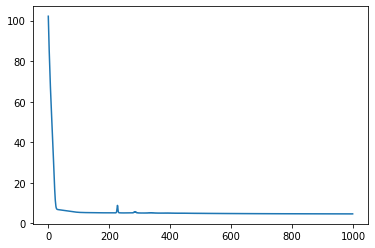

In [14]:
import matplotlib.pyplot as plt

plt.plot(val_metrics)

In [127]:
data_test = data_val.to_numpy()
X_test = data_test[:,:-1]
y_test = data_test[:,-1:]

# bias = np.ones((X_test.shape[0],1))
# X_test = np.hstack([bias,X_test])

In [128]:
X_test.shape

(836, 10)

In [129]:
y_test.shape

(836, 1)

In [130]:
W.shape

(11, 1)

In [131]:
Scores_new = X_test@W
MSE = np.mean((Scores_new-y_test)**2)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 11 is different from 10)

In [ ]:
MSE

5628.720769353856

In [ ]:
linear.predict_linear(X_test)